
<table>
  <tr>
    <td> <center><img src="images/header1.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Кластеризация</center></h2>
<h3><center>Лектор: Ефимов Владислав</center></h3>
<h3><center>Лекции готовили: Шестаков Андрей, Ефимов Владислав</center></h3>

In [1]:
%matplotlib inline

In [3]:
from ipywidgets import interact, IntSlider, fixed, FloatSlider

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

C:\Users\vald_\AppData\Local\Temp\ipykernel_1364\1509724131.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


# Методы обучение без учителя (Unsupervised)

* В чем отличие от Supervised методов?

* Кластеризация
* Уменьшение размерности
    * Метод главных компонент
    * Многомерное шкалирование
    * Тематические модели*
* Поиск ассоциативных правил

# Кластеризация

Основная задача кластерного анализа — разбиение исходного набора объектов на группы (кластеры) таким образом, чтобы объекты в группе были похожи друг на друга, а объекты из разных групп - отличались.

<center><img src="https://i.ytimg.com/vi/zPJtDohab-g/maxresdefault.jpg" width=600></center>

## Цели кластерного анализа

* **Поиск структуры** в данных и ее **интерпретация**
* Поиск аномальных объектов
* Детальный анализ отдельных кластеров
* Формирование признаков на основе кластеризации

## Use Case: Telegram Clustering Contest
1. Traverse an input directory and parse all HTML files (articles) in it with news content
2. Detect article language and filter out articles which are not in English or Russian
3. Classify articles into one or several of 7 categories: society, economy, technology, sports, entertainment, science, other
4. Filter out articles which are not news (e.g. how-tos, tips, encyclopedic content)
5. Group articles into threads. Thread is just a collection of articles about the same event
6. Sort articles within a thread by relevance
7. Sort threads by importance

2nd Place solution [description](https://medium.com/@alexkuznetsov/2nd-place-solution-for-telegram-data-clustering-contest-f28d55b98d30)

## Группы методов

* Методы основанные на прототипах
    * Каждый кластер ассоциируется с виртуальрным "эталонным" объектом
* Иерархические методы
    * Не простое разбиение, а целая иерархия
* Плотностные методы
    * Ищем плотные скопления точек в признаковом пространстве
* Вероятностные методы
    * Предполагаем, что данные порождены некоторой смесью вероятностных распределений
* Спектральные методы
    * Испольюзуем замечательные спектральные свойства разных матриц
* Сеточные методы
    * Бьем признаковое пространство на сегменты
* ...

## Алгоритм k-means
### Неформальное [демо](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## Алгоритм k-means

* Дано множество объектов $X = \{x_1, x_2, \dots, x_N\}$
* Кластер $C_k \Leftrightarrow \text{ центройд } \mu_k$
* Объект $x_i \in C_k \Leftrightarrow \mu_k = \arg \min\limits_{\mu_j} \|x_i - \mu_j \|^2$
* Надо найти такое разбиение на $K$ кластеров, чтобы минизировать
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$

* Метод $k$-средних является итеративным алгоритмом разбиения множества объектов на $K$ кластеров 

## Алгоритм k-means
1. Выбрать $K$ начальных центроидов случайным образом  $\rightarrow \mu_k, \ k=1\dots K$
2. Для каждой точки из датасета присвоить кластер, соответствующий ближайшему центроиду
$$C_k = \{x_n : ||x_n - \mu_k||^2 \leq ||x_n - \mu_l||^2 \quad \forall l \neq k \} $$
3. Обновить центройды: 
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$
4. Повторять 2 и 3 до тех пор, пока изменения перестанут быть существенными 


<center><img src='images/Kmeans_animation.gif' width=500></center>

# Основные факторы
* Начальная инициализация центройдов
* Количество кластеров

## Kак выбрать K?

* Не пользоваться обычным k-means (X-means, ik-means)
* Посмотреть на меры качества кластеризации
* Воспользоваться эвристиками

## Elbow method (Метод локтя)

* Критерий минимизации k-means
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
* Давайте возьмем всевозможные $K$, для каждого запустим алгоритм, посчитаем на результате $L(C)$ и выберем минимум!

* Ничего не выйдет... Почему?

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 


crit = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    crit.append(np.sqrt(kmeans.inertia_))
    
def elbow_demo(k=2):
    
    X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
    
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    
    ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax[0].scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax[1].plot(range(2,8), crit, marker='s')
    
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('$L^{(k)}(C)$')
    
    plt.show()
    
    

c:\Users\vald_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vald_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vald_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vald_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

## Elbow method (Метод локтя)

* Выбирают такое $k$, после которого функционал $L(C)$ уменьшается не слишком быстро
* Чуть более формально:
$$ D(k) = \frac{|L^{(k)}(C) - L^{(k+1)}(C)|}{|L^{(k-1)}(C) - L^{(k)}(C)|} \quad \text{"невелико"} $$

c:\Users\vald_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


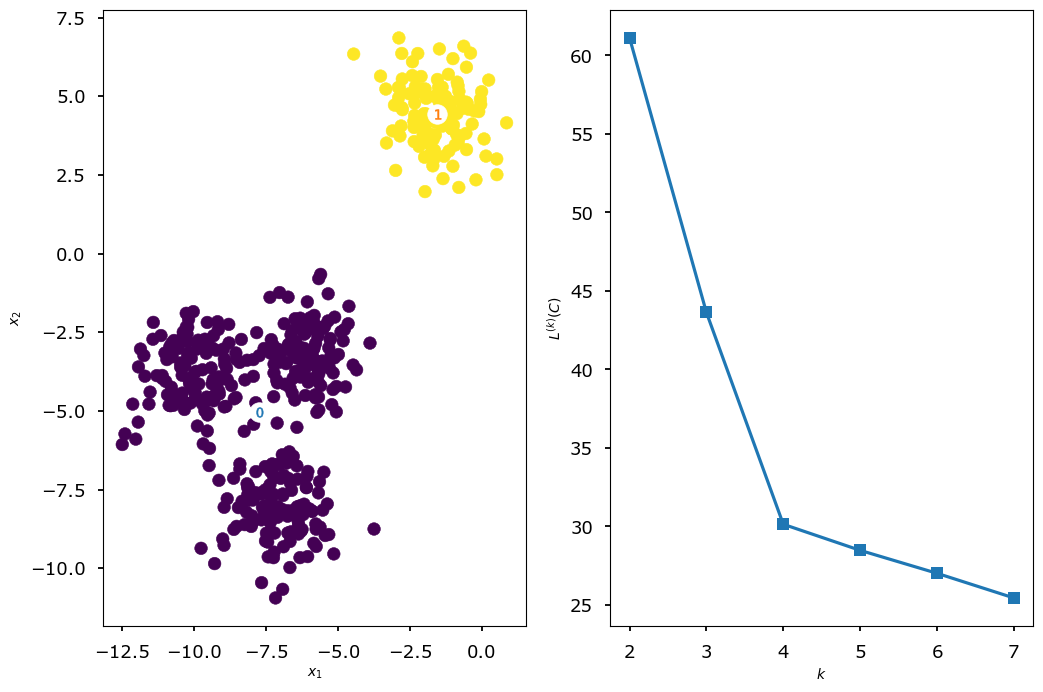

In [5]:
elbow_demo()

## Важно!
* Эвристика и меры качества клатеризации носят лишь рекомендательный характер!
* Если они ничего не дают, то лучше ориентироваться на свои знания в предметной области
* Или "выжать" из полученной кластеризации максимум
    * *3 из 5 полученных кластеров интерпретируются - и то хорошо*

## Начальная инициализация центройдов
* Выбрать координаты $K$ случайных объектов из датасета
    * Производить случайные запуски много раз и выбрать наиболее оптимальную инициализацию
* Использовать результат другой кластеризации на $K$ кластеров
* k-means++

### K-means++
* Первый центройд выбираем случайным образом из объектов датасета
* Для каждой точки рассчитываем расстояние $d_{\min}(x_i) = \min_{\mu_j} \|x_i - \mu_j\|^2$
* Точка назначается следующим центройдом с вероятностью $p(x_i) \propto d_{\min}(x_i)$

In [6]:
from sklearn.metrics import pairwise_distances

def demo_kmpp(iters=1):

    X, y = make_blobs(n_samples=550, cluster_std=1.5, n_features=2, centers=5, random_state=12345)

    X_grid1, X_grid2 = np.meshgrid(np.linspace(-12, 18, 500),
                                   np.linspace(-11, 8, 500))

    XX = np.c_[X_grid1.flatten(), X_grid2.flatten()]
    np.random.seed(1)
    centroids = np.empty((0, 2))

    for i in range(iters):
        if i == 0:
            d = np.ones_like(y, dtype=float)
        else:
            d = pairwise_distances(X, centroids, metric='euclidean').min(axis=1)
        weights = d/d.sum()

        centroid_idx = np.random.choice(X.shape[0], size=1, replace=False, p=weights)[0]
        centroids = np.r_[centroids, X[centroid_idx, np.newaxis]]

    d_grid = pairwise_distances(XX, centroids, metric='euclidean').min(axis=1)

    d_grid = d_grid.reshape(X_grid1.shape)
    d_grid = d_grid/d_grid.max()

    levels = np.linspace(0, 1, 100)

    plt.contourf(X_grid1, X_grid2, d_grid, cmap=plt.cm.Blues, alpha=0.7, levels=levels)
    plt.scatter(X[:, 0], X[:, 1], s=100)

    centers = centroids
    
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                    s=100, edgecolor='k')

    plt.xlabel('$x_1$', fontsize=15)
    plt.ylabel('$x_2$', fontsize=15)

    plt.tight_layout()
    plt.axis('equal')
    plt.show()


In [ ]:
interact(demo_kmpp, iters=IntSlider(min=1,max=6,step=1,value=1))

## Резюме

* Метод k-средних – жадный итеративный алгоритм
* Зависит от начальных центройдов и их количества

#### Преимущества
* Прост как пробка
* Имеет множество модификаций
* Интерпретация кластеров через центройды

#### Недостатки

* Подразумевает выпуклые кластеры
<center><img src='images/kmeans_2moons.png' width=800></center>

* Всегда* на выходе будет k кластеров
<center><img src='images/kmeans_digits.png' width=800></center>

<center><img src='images/kmeans-guys.jpeg'></center>


# Алгоритмы, основанные на плотности
## DBSCAN

## Хотелось бы...

* Получить кластеры высокой плотности, разделеные участками низкой плотности

<center><img src='images/dbscan.png'></center>



## Основная идея

* Для каждой точки кластера её окрестность заданного радиуса $\epsilon$ должна содержать не менее некоторого числа точек `min_pts`. 
* C такой точки можно начать расширение "плотного" кластера 
    * то есть каждая точка в $\epsilon$ окрестности будет добавляться в кластер
    * ее соседи тоже будут проверяться на критерий `min_pts`
* Расширение текущего кластера закончится, когда объекты перестанут удовлетворять условию `min_pts`

## Demo
Иногда, вместо тысячи слов, лучше один раз посмотреть, как он работает. Но с небольшими комментариями)


[Тык](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

## Types of points
* Core point: точки, в $\varepsilon$-окрестности которых $\ge \texttt{min_pts}$ точек
* Border point: не core, но содержит хотя бы 1 core точку в $\varepsilon$-окрестности
* Noise point: ни то ни се
<center><img src='images/dbscan_points_types.png'></center>

## DBSCAN

```{C}
1.function dbscan(X, eps, min_pts):
2.	initialize NV = X # not visited objects	
3.	for x in NV:
4.		remove(NV, x) # mark as visited
5.		nbr = neighbours(x, eps) # set of neighbours
6.		if nbr.size < min_pts:
7.			mark_as_noise(x)
8.		else:
9.			C = new_cluster() 
10.			expand_cluster(x, nbr, C, eps, min_pts, NV)
11.			yield C
```

##  expand_cluster

```{C}
1. function expand_cluster(x, nbr, C, eps, min_pts, NV):
2.	add(x, C)
3.	for x1 in nbr:
4.		if x1 in NV: # object not visited
5.			remove(NV, x1) # mark as visited
6.			nbr1 = neighbours(x1, eps)
7.			if nbr1.size >= min_pts:
8.				# join sets of neighbours
9.				merge(nbr, nbr_1)
10.		if x1 not in any cluster:
11.			add(x1, C)		
```

In [9]:
data = np.loadtxt('data/flame.txt')

In [11]:
from sklearn.cluster import DBSCAN


data = np.loadtxt('data/flame.txt')
X_data = data[:, :2]

def dbscan_demo(eps=1, min_pts=5):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(X_data)
    
    labels = dbscan.labels_
    
    plt.figure(figsize=(7,5))
    plt.scatter(X_data[:,0], X_data[:, 1], c=labels)
    
    plt.show()
    

In [15]:
from ipywidgets import interact, FloatSlider, IntSlider

In [19]:
X_data[0, :].max()

27.8

In [14]:
interact(dbscan_demo, eps=FloatSlider(min=0.1, max=10, step=0.05), min_pts=IntSlider(min=2, max=5, step=1))

interactive(children=(FloatSlider(value=0.1, description='eps', max=10.0, min=0.1, step=0.05), IntSlider(value…

<function __main__.dbscan_demo(eps=1, min_pts=5)>

## Итог

#### Преимущества
* Не требует $K$
* Кластеры произвольной формы
* Учитывает выбросы


#### Недостатки
* Не работает при различных плотностях кластеров
* Не всегда выявит кластеры

<center><img src='images/diff-dens.png'></center>

# Оценка качества кластеризаци

### Оценка качества кластеризации при известном groud truth

Пусть $\hat{\pi}$ - это полученное разбиение на кластеры, а $\pi^*$ - ground truth. 

<center><img src='http://web.cse.ohio-state.edu/~stiff.4/cse3521/images/iris-true-class-sepal.png' width=800></center>


#### Adjusted Rand Index

$$ \text{Rand}(\hat{\pi},\pi^*) = \frac{a + d}{a + b + c + d} \text{,}$$
где 
* $a$ количество пар объектов, находящихся в одинаковых кластерах в $\hat{\pi}$ и
$\pi^*$, 
* $b$ ($c$) количество пар объектов в одном и том же кластере в  $\hat{\pi}$ ($\pi^*$), но в разных в  $\pi^*$ ($\hat{\pi}$)
* $d$ количество пар объектов в разных кластерах в $\hat{\pi}$ и $\pi^*$

<center><img src='images/rand1.png' width=700></center>

#### Индекс Жаккара
$$ Jac(\hat{\pi}, \pi^*) = \frac{a}{a + b + c}$$

#### Точность, полнота и F-мера
$$ Precision(\hat{\pi}, \pi^*) = \frac{a}{a + b} $$
$$ Recall(\hat{\pi}, \pi^*) = \frac{a}{a + c} $$
$$ F-measure(\hat{\pi}, \pi^*) = \frac{2Precision \cdot Recall}{Precision + Recall} $$

## Меры валидности кластеров (no ground truth)

* Измеряют полученое разбиения по отношению к качествам хорошей кластеризации
    * Компактность объектов внутри кластера
    * Разделимость кластеров друг от друга
    
Про различные меры качества кластризации и меры валидности кластеров в sklearn можно почитать [тут](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) 

##### Критерий Silhouette

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$

* $a(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_k$
* $b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_j$
$$
silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации.

<center><img src='images/sil1.png'></center>

<center><img src='images/sil2.png'></center>

#### Важно!
* Эвристики и меры качества клатеризации носят лишь рекомендательный характер!
* Если они ничего не дают, то лучше ориентироваться на свои знания в предметной области
* Или "выжать" из полученной кластеризации максимум
    * *3 из 5 полученных кластеров интерпретируются - и то хорошо*

# Литература
* [Mohammed J. Zaki, Ch3](https://www.amazon.com/Data-Mining-Analysis-Fundamental-Algorithms/dp/0521766338)
* [Jure Leskovec, Anand Rajaraman, Jeffrey D. Ullman, Ch7](http://www.mmds.org/)
* [Andrew R. Webb, Keith D. Copsey, Ch11](http://eu.wiley.com/WileyCDA/WileyTitle/productCd-0470682272.html)
* [Tutorial on spectral clustering](https://arxiv.org/pdf/0711.0189.pdf)

## Вопросы?

### Пожалуйста, напишите отзыв о лекции